<a href="https://colab.research.google.com/github/IgnacioPardo/TDIV/blob/main/Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
from pprint import pprint
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define Graph Edges and Weights

In [2]:
weights = {
            (1, 2) : 10,
            (1, 3) : 3,
            (2, 3) : 6,
            (2, 4) : 2,
            (3, 4) : 10,
            (3, 5) : 2,
            (4, 5) : 1,
            (5, 6): 100,
          }

nodos = set(np.unique(np.array(list(weights.keys())).flatten()))
edges = list(weights.keys())

# Visualize initial Graph

(-0.54, 2.54, -0.27, 1.27)

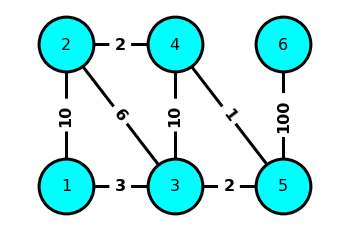

In [8]:
pos = {}
x = 0
y = 0
for i, n in enumerate(nodos):
  pos[n] = (x, y)
  if y == 1:
    y = 0
    x += 1
  else:
    y += 1

G = nx.Graph()
G.add_edges_from(edges)
options = {
    "font_size": 16,
    "node_size": 3000,
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "connectionstyle": "arc3, rad=0",
    "node_color": "cyan",
}


nx.draw_networkx(G, pos, **options)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights,
    font_color='black',
    font_size=16, 
    font_weight='bold'
)
ax = plt.gca()
ax.margins(0.20)
plt.axis('off')

# Dijkstra from initial node

In [4]:
init = 1 #@param {type:"integer"}
orig = init
n_ = {orig}
mincosts = {orig: 0}
paths = {}

for (x, y) in weights.keys():
  if x is not orig and y is not orig:
    mincosts[x] = sys.maxsize
    mincosts[y] = sys.maxsize

while nodos is not n_:
  for (x, y), c in weights.items():
    other = None
    if x == orig:
      other = y
    if y == orig:
      other = x

    if other:
      if mincosts[other] > mincosts[orig] + c:
        paths[other] = (orig, mincosts[orig] + c)
      mincosts[other] = min(mincosts[other], mincosts[orig] + c)

  ordered = [n for n, _ in sorted(mincosts.items(), key=lambda item: item[1]) if n not in n_]
  if len(ordered) is 0:
    break
  orig = ordered[0]
  n_.add(orig)

print(mincosts)

{1: 0, 2: 8, 3: 3, 4: 6, 5: 5, 6: 105}


# Minimun cost paths

In [6]:
pprint(paths)
display(pd.DataFrame(paths))
minpaths = {}

for n in nodos - {init}:
  minpaths[n] = []
  k = n
  while k != init:
    minpaths[n].append(paths[k][0])
    k = paths[k][0]
  minpaths[n] = minpaths[n][::-1]
  
pprint(minpaths)

{2: (4, 8), 3: (1, 3), 4: (5, 6), 5: (3, 5), 6: (5, 105)}


,2,3,4,5,6
0,4,1,5,3,5
1,8,3,6,5,105


{2: [1, 3, 5, 4], 3: [1], 4: [1, 3, 5], 5: [1, 3], 6: [1, 3, 5]}


# Minimum cost path to destination

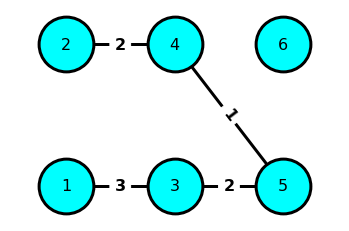

In [7]:
dest = 2 #@param {type:"integer"}

RG = nx.Graph()
options = {
    "font_size": 16,
    "node_size": 3000,
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "connectionstyle": "arc3, rad=0",
    "node_color": "cyan",
}

reduced_weights = {}
reduced_nodes = minpaths[dest] + [dest]

for i, n in enumerate(reduced_nodes[:-1]):
  pair = (n, reduced_nodes[i+1])
  weight = 0
  if pair in weights:
    weight = weights[pair]
  else:
    weight = weights[(reduced_nodes[i+1], n)]
  reduced_weights[pair] = weight

RG.add_edges_from(list(reduced_weights.keys()))

for n in nodos - set(reduced_nodes):
  RG.add_node(n)

def plot_RG():
  nx.draw_networkx(RG, pos, **options)
  nx.draw_networkx_edge_labels(
      RG, pos,
      edge_labels=reduced_weights,
      font_color='black',
      font_size=16, 
      font_weight='bold'
  )
  ax = plt.gca()
  ax.margins(0.20)
  plt.axis('off')

plot_RG()